In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
import matplotlib as plt
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

## L'importation des données:

In [3]:
data_sain = pd.read_csv('/content/drive/My Drive/PFE/dataSain2.csv')
def_a = pd.read_csv('/content/drive/My Drive/PFE/dataDéfA.csv') # défaut angle
def_t = pd.read_csv('/content/drive/My Drive/PFE/dataDéfT.csv') # défaut tension
def_v1 = pd.read_csv('/content/drive/My Drive/PFE/dataDéfV11.csv') # défaut vitesse en amont
def_v2 = pd.read_csv('/content/drive/My Drive/PFE/dataDéfV2.csv') # défaut vitesse en aval


In [4]:
def_a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,16344,16345,16346,16347,16348,16349,16350,16351,16352,16353,16354,16355,16356,16357,16358,16359,16360,16361,16362,16363,16364,16365,16366,16367,16368,16369,16370,16371,16372,16373,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,0.210040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.210643,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.210651,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,0.209125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,0.210651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

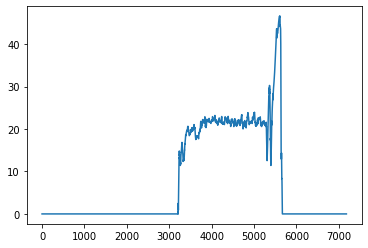

In [5]:
# plot des signaux
def_t.iloc[16].plot()

### Prétraitement des données: 

en premier lieu on remplace les cases vides obtenus à cause de la différence de la longeur des vecteurs avec des zéros.



In [6]:
data_sain = data_sain.replace(np.nan, 0)
def_a = def_a.replace(np.nan,0)
def_t = def_t.replace(np.nan,0)
def_v1 = def_v1.replace(np.nan,0)
def_v2 = def_v2.replace(np.nan,0)

aprés on fait le codage de nos données qui nous permettra de les classifier, aprés on les regroupes sous une matrice train.

In [7]:
data_sain['y']=0
def_a['y'] = 1
def_t['y'] = 2
def_v1['y'] = 3
def_v2['y'] = 4

train = pd.DataFrame()
train=data_sain.append(def_a)
train=train.append(def_t)
train = train.append(def_v1)
train = train.append(def_v2)


In [8]:
train['y']

0     0
1     0
2     0
3     0
4     0
     ..
12    4
13    4
14    4
15    4
16    4
Name: y, Length: 526, dtype: int64

on dévise la matrice train de nos données sur deux, x et y.

In [9]:
x = pd.DataFrame()
y = pd.DataFrame()
y = train['y']
x = train.drop(['y'], axis = 1)

In [10]:
x.shape

(526, 16384)

In [11]:
x.isnull().any()

0        False
1        False
2        False
3        False
4        False
         ...  
16379     True
16380     True
16381     True
16382     True
16383     True
Length: 16384, dtype: bool

on remarque qu'il y a des cases vide aprés le regroupement de nos données donc on les a remplacé par 0 pour évite les problèmes.

In [12]:
x = x.replace(np.nan,0)

In [13]:
x.isnull().any()

0        False
1        False
2        False
3        False
4        False
         ...  
16379    False
16380    False
16381    False
16382    False
16383    False
Length: 16384, dtype: bool

### Normalisation : 

la normalisation de nos données entre 0 et 1 en utilisant min_max scaler

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x = pd.DataFrame(x_scaled)

on dévise nous données sur des données de training et des données de test.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=21)

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Columns: 16384 entries, 0 to 16383
dtypes: float64(16384)
memory usage: 65.8 MB


## modèle d'apprentissage automatique:

# 1. Neural network MLP

In [17]:
from sklearn.neural_network import MLPClassifier


#### tunning des paramétres:

In [ ]:
parameter_space = {
    'hidden_layer_sizes' : [ (15, 30), (20, 40), (10, 30), (10, 20 ), (30, 60)]
}

In [ ]:
classifier = MLPClassifier(max_iter=1500,activation = 'relu', solver='lbfgs', alpha = 0.05, learning_rate='adaptive', random_state=1)


In [ ]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(classifier, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='adaptive',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=1500, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'hid

In [ ]:
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'hidden_layer_sizes': (15, 30)}
0.875 (+/-0.041) for {'hidden_layer_sizes': (15, 30)}
0.813 (+/-0.099) for {'hidden_layer_sizes': (20, 40)}
0.830 (+/-0.109) for {'hidden_layer_sizes': (10, 30)}
0.864 (+/-0.042) for {'hidden_layer_sizes': (10, 20)}
0.864 (+/-0.048) for {'hidden_layer_sizes': (30, 60)}


en mettant les paramétre optimale de notre modèle : 
on a eu meilleur résultat en changeant le parametere "solver" qui est l'optimisateur 

In [18]:
classifier = MLPClassifier(hidden_layer_sizes=(  30,15,30  ),
                           max_iter=1800,activation = 'relu', solver='lbfgs', alpha = 0.05, learning_rate='adaptive', random_state=1)


le training de notre data :

In [19]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 15, 30), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=1800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [20]:
y_pred = pd.DataFrame()
y_pred = classifier.predict(X_test)

In [21]:
loss = classifier.loss_

### la perte ( loss function ) :

In [22]:
loss

0.08588992253293751

In [23]:
classifier.get_params()

{'activation': 'relu',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (30, 15, 30),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1800,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [24]:
classifier.n_iter_

1612

accuracy of training : 

In [25]:
classifier.score(X_train, y_train)*100

98.57954545454545

le score de validation :

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy for model MLP: %.2f" % (accuracy_score(y_test, y_pred) * 100))


Accuracy for model MLP: 92.53


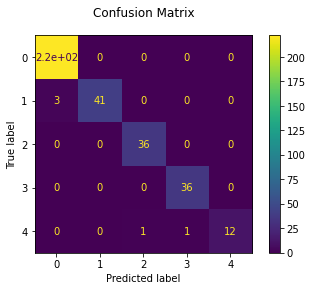

In [27]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig=plot_confusion_matrix(classifier, X_train, y_train,)
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

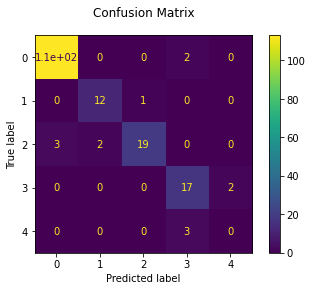

In [28]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
fig=plot_confusion_matrix(classifier, X_test, y_test,)
fig.figure_.suptitle("Confusion Matrix ")
plt.show()

In [29]:
ytrai = classifier.predict(X_train)

le rapport ( un outil de visualisation) : 

In [30]:
from sklearn.metrics import classification_report
print(classification_report(ytrai,y_train))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       225
           1       0.93      1.00      0.96        41
           2       1.00      0.97      0.99        37
           3       1.00      0.97      0.99        37
           4       0.86      1.00      0.92        12

    accuracy                           0.99       352
   macro avg       0.96      0.99      0.97       352
weighted avg       0.99      0.99      0.99       352



In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_pred ,y_test))


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       116
           1       0.92      0.86      0.89        14
           2       0.79      0.95      0.86        20
           3       0.89      0.77      0.83        22
           4       0.00      0.00      0.00         2

    accuracy                           0.93       174
   macro avg       0.72      0.71      0.71       174
weighted avg       0.93      0.93      0.93       174



# Xgboost: 
en utilisant le modèle d'apprentissage xgboost:

In [32]:
import xgboost as xgb
model2 = xgb.XGBClassifier(n_estimators=55, max_depth=8, learning_rate=0.1, subsample=0.5)
eval = [(X_train, y_train), (X_test, y_test)]
train_model2 = model2.fit(X_train, y_train,  eval_set= eval, eval_metric=["mlogloss"])
#prediction and Classification Report
from sklearn.metrics import classification_report

pred2 = train_model2.predict(X_test)

#Let's use accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy for model 2: %.2f" % (accuracy_score(y_test, pred2) * 100))


[0]	validation_0-mlogloss:1.42463	validation_1-mlogloss:1.43561
[1]	validation_0-mlogloss:1.27189	validation_1-mlogloss:1.2832
[2]	validation_0-mlogloss:1.14263	validation_1-mlogloss:1.1559
[3]	validation_0-mlogloss:1.0345	validation_1-mlogloss:1.0513
[4]	validation_0-mlogloss:0.939218	validation_1-mlogloss:0.960961
[5]	validation_0-mlogloss:0.856968	validation_1-mlogloss:0.886974
[6]	validation_0-mlogloss:0.782847	validation_1-mlogloss:0.813498
[7]	validation_0-mlogloss:0.719566	validation_1-mlogloss:0.754868
[8]	validation_0-mlogloss:0.658399	validation_1-mlogloss:0.697143
[9]	validation_0-mlogloss:0.609272	validation_1-mlogloss:0.652812
[10]	validation_0-mlogloss:0.564892	validation_1-mlogloss:0.610199
[11]	validation_0-mlogloss:0.524336	validation_1-mlogloss:0.574633
[12]	validation_0-mlogloss:0.489504	validation_1-mlogloss:0.542727
[13]	validation_0-mlogloss:0.455861	validation_1-mlogloss:0.514481
[14]	validation_0-mlogloss:0.424008	validation_1-mlogloss:0.489003
[15]	validation_0

In [37]:
from sklearn.metrics import classification_report
print(classification_report(pred2,y_test))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98       120
           1       0.92      0.86      0.89        14
           2       0.75      0.95      0.84        19
           3       0.84      0.84      0.84        19
           4       0.00      0.00      0.00         2

    accuracy                           0.93       174
   macro avg       0.70      0.72      0.71       174
weighted avg       0.94      0.93      0.93       174



In [ ]:
results = train_model2.evals_result()

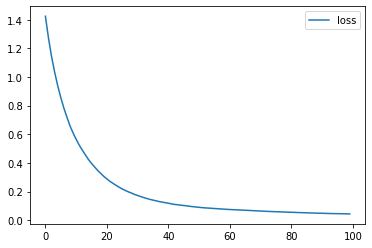

In [ ]:
# plot learning curves
pyplot.plot(results['validation_0']["mlogloss"], label='loss')
#pyplot.plot(results['validation_1']["mlogloss"], label='test')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


## SVM: 
en utilisant le modèle support vector machine.

In [ ]:
from sklearn import svm 
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred3 = clf.predict(X_test)

In [ ]:
print("Accuracy for model svm: %.2f" % (accuracy_score(y_test, pred3) * 100))

Accuracy for model svm: 82.18
